In [2]:
import networkx as nx
import numpy as np
import math
import matplotlib.pyplot as plt

# Networkx

Networkx is a Python library people commonly use when dealing with graphs.




# $G(n,p)$

This notebook aims to empirically investigate the properties of Erdős-Rényi graphs, specifically the $G(n,p)$ model, and compare them with real-world networks. Networkx provides a convenient way to generate random graphs using built-in functions for various commonly used graph models. To create an Erdős-Rényi graph, we can use the function `nx.erdos_renyi_graph(n, p)`, where `n` is the number of nodes and `p` is the probability of an edge between two nodes. The function returns an `nx.Graph` object containing the nodes and edges of the generated graph.


## Statistics of $G(n,p)$ (20 pts)

In the upcoming code cell, we will be generate graphs from $G(n,p)$ model with $n$ set to 100, using different values of $p$ ranging from 0.001 to 0.081, with a small step size such as 0.005. For each value of $p$, we should generate 10 graph samples from the model and report the average of the following graph statistics with error bars for std. Explanation on how we compute these statistics using networkx functions:

- Number of edges: To obtain the number of edges in a given nx.graph object G, we can utilize the function `G.number_of_edges()`.

- Number of triangles: Using `nx.triangles(G)`, a dictionary of (node id, number of triangles participated) key-value pairs is returned. To calculate the total number of triangles in G, we simply sum all the values in the dictionary and divide the result by 3 (since each triangle is counted three times in the dictionary).

- Number of isolated nodes: If a node has degree 0, then it is an isolated node. The function G.degree is a map-like object consisting of (node id, node degree) pairs. To count the number of isolated nodes, iterate through `G.degree` and count the number of 0s in the values.

- Number of connected components: In graph theory, a connected component is a set of vertices in a graph that are linked to each other by paths. Using nx.connected_components(G), a node list generator is returned, which yields one component at a time. To get the total number of connected components, you can use `len(list(nx.connected_components(G)))`.

For each graph statistic, we generate a plot where the x-axis represents the values of $p$, and the y-axis represents the average of the statistic. 

In [4]:
#number of p values, number of graphs per p value
rows, cols = (17, 10)
#store each graph in a list
graphs = [[None for i in range(cols)] for x in range(rows)]
p=.001
#geneate the graphs
for row in range(rows):
    for col in range(cols):
        x=nx.erdos_renyi_graph(100, p)
        graphs[row][col]=x
    p += .005
#a 2-d list to store all the data for each graph
edges = [[0 for i in range(cols)] for x in range(rows)]
triangles = [[0 for i in range(cols)] for x in range(rows)]
isolated = [[0 for i in range(cols)] for x in range(rows)]
connected = [[0 for i in range(cols)] for x in range(rows)]
#calculating the data
for row in range(rows):
    for col in range(cols):
        edges[row][col]=graphs[row][col].number_of_edges()
        for x, y in nx.triangles(graphs[row][col]).items():
            triangles[row][col] += y
        triangles[row][col] =  triangles[row][col]/3
        for x, y in graphs[row][col].degree:
            if(y == 0):
                isolated[row][col] += 1
        connected[row][col]= len(list(nx.connected_components(graphs[row][col])))
#calculating mean and std for all the data
mean = [[0 for i in range(17)] for x in range(4)]
std = [[0 for i in range(17)] for x in range(4)]
for i in range(17):
        mean[0][i] = np.mean(edges[i])
        mean[1][i] = np.mean(triangles[i])
        mean[2][i] = np.mean(isolated[i])
        mean[3][i] = np.mean(connected[i])
        std[0][i] = np.std(edges[i])
        std[1][i] = np.std(triangles[i])
        std[2][i] = np.std(isolated[i])
        std[3][i] = np.std(connected[i])
#the labels for the x values, which are probability values, for all of the graphs
labels= [0 for i in range(17)]
for i in range(17):
    x=(.005*i) + .001 
    labels[i]="{:.3f}".format(round(x , 3))
x_pos=np.arange(len(labels))

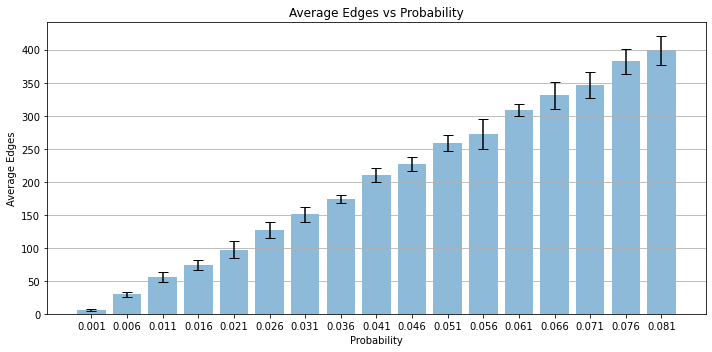

In [5]:
# plot with error bars for number of edges.
#mean of the data we're graphing
CTEs=mean[0]
#error for the data we're graphing
error=std[0]
fig, ax = plt.subplots(figsize=(10,5))

ax.bar(x_pos, CTEs,
       yerr=error,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=5)
ax.set_ylabel('Average Edges')
ax.set_xlabel('Probability')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_title('Average Edges vs Probability')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()

plt.show()

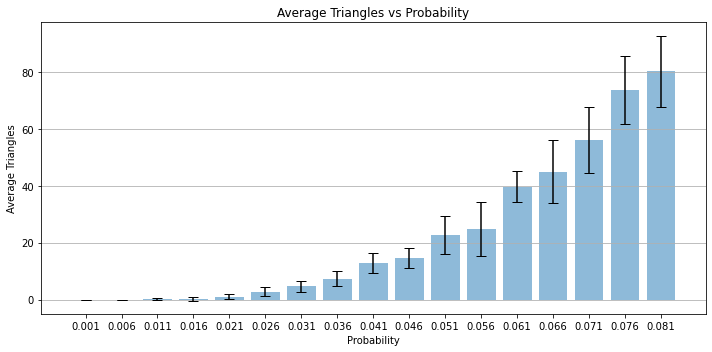

In [6]:
# plot with error bars for number of triangles.
#mean of the data we're graphing
CTEs=mean[1]
#error of the data we're graphing
error=std[1]
fig, ax = plt.subplots(figsize=(10,5))

ax.bar(x_pos, CTEs,
       yerr=error,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=5)
ax.set_ylabel('Average Triangles')
ax.set_xlabel('Probability')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_title('Average Triangles vs Probability')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()

plt.show()

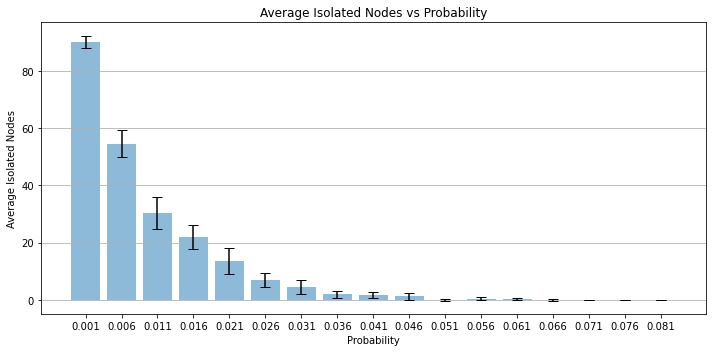

In [7]:
# plot with error bars for number of isolated nodes.
#mean of the data we're graphing
CTEs=mean[2]
#error of the data we're graphing
error=std[2]
fig, ax = plt.subplots(figsize=(10,5))

ax.bar(x_pos, CTEs,
       yerr=error,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=5)
ax.set_ylabel('Average Isolated Nodes')
ax.set_xlabel('Probability')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_title('Average Isolated Nodes vs Probability')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()

plt.show()

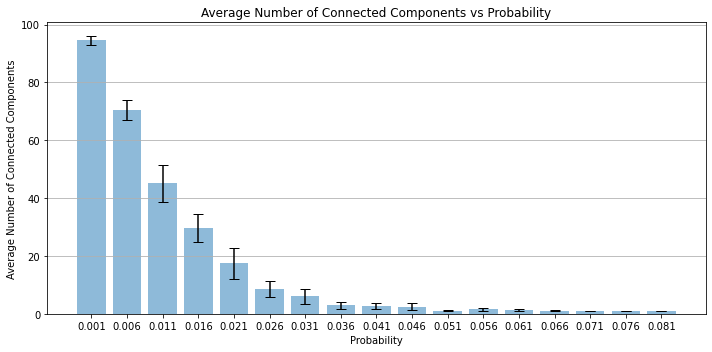

In [8]:
# plot with error bars for number of connected components.
#mean of the data we're graphing
CTEs=mean[3]
#error of the data we're graphing
error=std[3]
fig, ax = plt.subplots(figsize=(10,5))

ax.bar(x_pos, CTEs,
       yerr=error,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=5)
ax.set_ylabel('Average Number of Connected Components')
ax.set_xlabel('Probability')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_title('Average Number of Connected Components vs Probability')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()

plt.show()

# Real world network
We have a real-world social network dataset saved as edgelist format named "fb-pages-food.edges". Each line in this file has the format of "node1,node2" that represents an edge connecting node1 and node2. An edgelist file can be loaded as nx.Graph directly using nx.read_edgelist() like the following.

In [9]:
G = nx.read_edgelist("fb-pages-food.edges", delimiter=',')

How many nodes and edges are there in this graph? 

In [42]:
# Report the graph statistics.
#printing number of edges and nodes
print("Number of Nodes: ", G.number_of_nodes())
print("Number of Edges: ", G.number_of_edges())
triangles=0
#calculating number of triangles
for x, y in nx.triangles(G).items():
            triangles += y
isolated=0
#calculating number of isolated nodes
for x, y in G.degree:
    if(y == 0):
        isolated += 1
#number of connected components
connected= len(list(nx.connected_components(G)))
print("Number of Triangles: ", "{:.0f}".format(triangles/3))
print("Number of Isolated Nodes: ", isolated)
print("Number of Connected Components: ", connected)

Number of Nodes:  620
Number of Edges:  2102
Number of Triangles:  2935
Number of Isolated Nodes:  0
Number of Connected Components:  1


In the next cell, we plot a histogram of the node degrees in this graph with bins=15.

<function matplotlib.pyplot.show(close=None, block=None)>

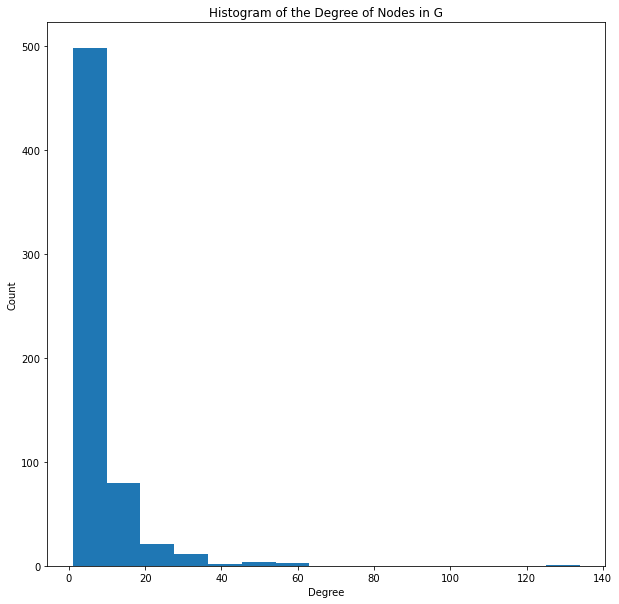

In [11]:
plt.figure(figsize=(10,10))
common_params = dict(bins=15)
#a list to store all of the degrees
count = [0 for i in range(G.number_of_nodes())]
i=0
for x, y in G.degree:
    count[i]=y
    i += 1
plt.title('Histogram of the Degree of Nodes in G')
plt.hist(count, **common_params)
plt.xlabel("Degree")
plt.ylabel("Count")
plt.show

## Fitting the data with G(n,p)

In [12]:
#E(edges)=np where n is the number of pairs of nodes
#p=m/(nodes c 2)
#a function to calculate p from the expectation of edges of a G(n, p) model
def calculateP(nodes, edges):
    p=edges/math.comb(nodes, 2)
    return p
print("Estimated value of p:", calculateP(G.number_of_nodes(), G.number_of_edges()))
p=calculateP(G.number_of_nodes(), G.number_of_edges())

Estimated value of p: 0.0109541925061233


In [40]:
number=10
#to store all of the graphs
graphs=[None for i in range(number)]
#to store all of the data
edges=[0 for i in range(number)] 
triangles=[0 for i in range(number)] 
isolated=[0 for i in range(number)] 
connected=[0 for i in range(number)]
#getting the graphs
for i in range(number):
    graphs[i]=nx.erdos_renyi_graph(G.number_of_nodes(), p)
#getting all of the data
for col in range(number):
        edges[col]=graphs[col].number_of_edges()
        for x, y in nx.triangles(graphs[col]).items():
            triangles[col] += y
        triangles[col] =  triangles[col]/3
        for x, y in graphs[col].degree:
            if(y == 0):
                isolated[col] += 1
        connected[col]= len(list(nx.connected_components(graphs[col])))
#finding the mean of all the data
mean= [0 for i in range(4)]
for i in range(number):
    mean[0] += edges[i]
    mean[1] += triangles[i]
    mean[2] += isolated[i]
    mean[3] += connected[i]
mean[0]=mean[0]/number
mean[1]=mean[1]/number
mean[2]=mean[2]/number
mean[3]=mean[3]/number
print("Average amount of edges:", mean[0])
print("Average amount of triangles:", mean[1])
print("Average amount of isolated nodes:", mean[2])
print("Average amount of connected components:", mean[3])

Average amount of edges: 2110.0
Average amount of triangles: 52.0
Average amount of isolated nodes: 0.5
Average amount of connected components: 1.5


<function matplotlib.pyplot.show(close=None, block=None)>

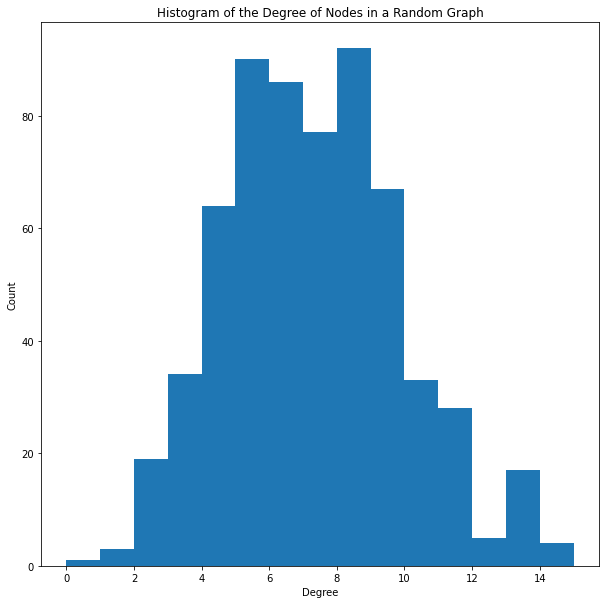

In [41]:
plt.figure(figsize=(10,10))
common_params = dict(bins=15)
#count of the degrees of all the nodes
count = [0 for i in range(G.number_of_nodes())]
i=0
for x, y in graphs[1].degree:
    count[i]=y
    i += 1
plt.title('Histogram of the Degree of Nodes in a Random Graph')
plt.hist(count, **common_params)
plt.xlabel("Degree")
plt.ylabel("Count")
plt.show


## Discussion
The real graph has degree values concentrated between 1 and 10. However, the random graph has degree values concentrated around 4 to 8. Also, the random graph's degree histogram ressembles the normal distribution while the real graph does not.

## A random graph model that fits the degree sequence (10pts)

Given a sequence of expected degrees $(d_1,d_2\dots d_n)$ of length n, we generate a graph with n nodes, and assigns an edge between node $u$ and node $v$ with probability $$p_{uv}={d_ud_v\over \sum_k d_k}$$.

This model is known as the Chung-Lu model and is implemented in the networkx library. To generate a graph from this model, we simply use the function `nx.expected_degree_graph(node_degree_list, selfloops=False)`.

To compare the generated graph with a real social network, we pass the degree sequence of the real network into this model and generate 10 samples. Then, we plot the degree histogram of the generated graphs and compare it with the original graph. Additionally, we report the same graph statistics for the generated graphs and compare them with the original graph. 

<function matplotlib.pyplot.show(close=None, block=None)>

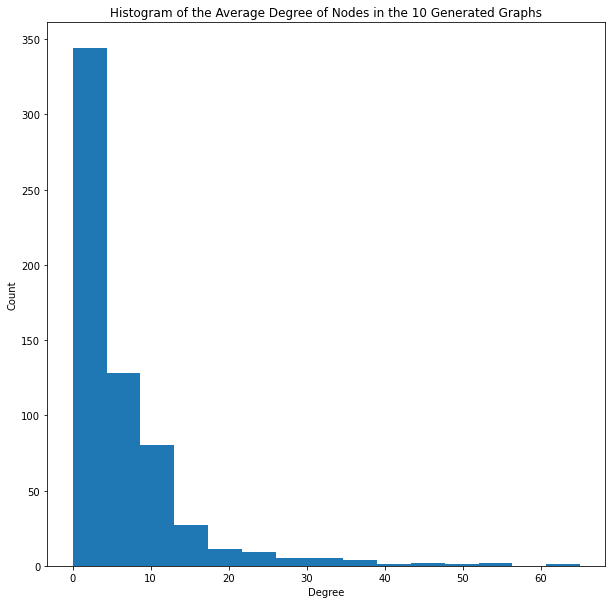

In [31]:
#to store all the degrees of the nodes
degree=[0 for i in range(G.number_of_nodes())]
i=0
#removing the node names
for x, y in (G.degree):
    degree[i]=y
    i += 1
#to store all the graphs
graphs= [0 for i in range(10)]
#creating the graphs from the node degrees
for i in range(10):
    graphs[i]=nx.expected_degree_graph(degree, selfloops=False)
#plotting the graph
plt.figure(figsize=(10,10))
common_params = dict(bins=15)

z = [0 for i in range(G.number_of_nodes())]
a=0
for i in range(10):
    for x, y in graphs[i].degree:
        z[a]=y
        a += 1
    a=0
for i in range(10):
    z[i] =z[i]/10
plt.title('Histogram of the Average Degree of Nodes in the 10 Generated Graphs')
plt.hist(z, **common_params)
plt.xlabel("Degree")
plt.ylabel("Count")
plt.show

In [16]:
number=10
#to store all the data
edges=[0 for i in range(number)] 
triangles=[0 for i in range(number)] 
isolated=[0 for i in range(number)] 
connected=[0 for i in range(number)] 
#calculating the data
for col in range(number):
        edges[col]=graphs[col].number_of_edges()
        for x, y in nx.triangles(graphs[col]).items():
            triangles[col] += y
        triangles[col] =  triangles[col]/3
        for x, y in graphs[col].degree:
            if(y == 0):
                isolated[col] += 1
        connected[col]= len(list(nx.connected_components(graphs[col])))
mean= [0 for i in range(4)]
#calculating the mean for all the data
for i in range(number):
    mean[0] += edges[i]
    mean[1] += triangles[i]
    mean[2] += isolated[i]
    mean[3] += connected[i]
mean[0]=mean[0]/number
mean[1]=mean[1]/number
mean[2]=mean[2]/number
mean[3]=mean[3]/number
print("Average amount of edges:", mean[0])
print("Average amount of triangles:", mean[1])
print("Average amount of isolated nodes:", mean[2])
print("Average amount of connected components:", mean[3])

Average amount of edges: 2103.4
Average amount of triangles: 1029.2
Average amount of isolated nodes: 59.3
Average amount of connected components: 61.2


## Discussion
The histogram from the new type of generated graphs ressembles the histogram of the real graph much closer. It has degree values concentrated from 0 to 10 and doesn't resemble a normal distribution similarly to the real graph. However, the statistics from the newly generated graphs are very different from the real graph except for the average number of edges. The number of edges is similar with the generated graphs, but the amount of triangles is about 15 times higher, the average amount of isolated nodes is about 120 times higher, and the average amount of connected components is about 40 times higher in the generated graphs than the real graph on average.